## Installation

In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


## Importation

In [3]:
import sqlalchemy as sa
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

## Data Collection and Loading (Connecting to a database on SQL Server)

In [4]:
# Establishing the connection
connection_string = 'DRIVER={SQL server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=dataAnalyst_LP2;PWD=A3g@3kR$2y'
engine = sa.create_engine(f'mssql+pyodbc:///?odbc_connect={connection_string}')

In [5]:
# Creating a connection
connection = engine.connect()

In [6]:
# Executing a simple query
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
result = connection.execute(query)

In [7]:
# Fetching all the rows from the result set into a Pandas DataFrame
df = pd.DataFrame(result.fetchall(), columns=result.keys())

In [8]:
# Printing the DataFrame
print(df)

              customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0             7590-VHVEG  Female          False     True       False       1   
1             5575-GNVDE    Male          False    False       False      34   
2             3668-QPYBK    Male          False    False       False       2   
3             7795-CFOCW    Male          False    False       False      45   
4             9237-HQITU  Female          False    False       False       2   
...                  ...     ...            ...      ...         ...     ...   
2995          2209-XADXF  Female          False    False       False       1   
2996          6620-JDYNW  Female          False    False       False      18   
2997          1891-FZYSA    Male           True     True       False      69   
2998          4770-UEZOX    Male          False    False       False       2   
2999  1A1:U3001038-RQOST    Male          False     True        True      19   

      PhoneService MultipleLines Intern

In [9]:
# Closing the connection
connection.close()
engine.dispose()

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [12]:
df1 = pd.read_csv('C:\\Users\\X1 CARBON\\Downloads\\LP2_Telco-churn-last-2000.csv')

In [13]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [14]:
print(df1)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     5600-PDUJF    Male              0      No         No       6   
1     8292-TYSPY    Male              0      No         No      19   
2     0567-XRHCU  Female              0     Yes        Yes      69   
3     1867-BDVFH    Male              0     Yes        Yes      11   
4     2067-QYTCF  Female              0     Yes         No      64   
...          ...     ...            ...     ...        ...     ...   
2038  6840-RESVB    Male              0     Yes        Yes      24   
2039  2234-XADUH  Female              0     Yes        Yes      72   
2040  4801-JZAZL  Female              0     Yes        Yes      11   
2041  8361-LTMKD    Male              1     Yes         No       4   
2042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             Yes                No             DSL             No  ...   
1        

In [15]:
df_train= pd.concat([df,df1])
df_train.to_csv('Attrition Train.csv')

In [16]:
df.shape

(3000, 21)

In [17]:
df1.shape

(2043, 21)

In [18]:
df_train.shape

(5043, 21)

In [19]:
df_train.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [20]:
df_test = pd.read_excel('C:\\Users\\X1 CARBON\\Downloads\\Telco-churn-second-2000.xlsx')

In [21]:
df_test.shape

(2000, 20)

In [22]:
df_test.to_csv('Attrition Test.csv')

In [23]:
df_test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

# Exploratory Data Analysis: EDA

In [24]:
# Perform EDA
print(df_train.head())

   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female         False    True      False       1        False   
1  5575-GNVDE    Male         False   False      False      34         True   
2  3668-QPYBK    Male         False   False      False       2         True   
3  7795-CFOCW    Male         False   False      False      45        False   
4  9237-HQITU  Female         False   False      False       2         True   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0          None             DSL          False  ...            False   
1         False             DSL           True  ...             True   
2         False             DSL           True  ...            False   
3          None             DSL           True  ...             True   
4         False     Fiber optic          False  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False 

In [25]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [26]:
print(df_train.describe())

            tenure  MonthlyCharges
count  5043.000000     5043.000000
mean     32.576641       65.090214
std      24.529807       30.068133
min       0.000000       18.400000
25%       9.000000       35.775000
50%      29.000000       70.550003
75%      56.000000       90.050003
max      72.000000      118.650002


In [27]:
# Check unique values in a column
unique_values = df_train['OnlineBackup'].unique()
print(unique_values)

# Check unique values in a column
unique_values = df_train['Partner'].unique()
print(unique_values)

# Check unique values in a column
unique_values = df_train['TechSupport'].unique()
print(unique_values) 

# Check unique values in a column
unique_values = df_train['PaymentMethod'].unique()
print(unique_values) 

# Check unique values in a column
unique_values = df_train['Contract'].unique()
print(unique_values)  

# Check unique values in a column
unique_values = df_train['SeniorCitizen'].unique()
print(unique_values)

# Check unique values in a column
unique_values = df_train['Dependents'].unique()
print(unique_values) 

# Check unique values in a column
unique_values = df_train['PhoneService'].unique()
print(unique_values) 

unique_values = df_train['MultipleLines'].unique()
print(unique_values)

unique_values = df_train['InternetService'].unique()
print(unique_values)

unique_values = df_train['OnlineSecurity'].unique()
print(unique_values) 

unique_values = df_train['DeviceProtection'].unique()
print(unique_values)

unique_values = df_train['StreamingTV'].unique()
print(unique_values)

unique_values = df_train['StreamingMovies'].unique()
print(unique_values)

unique_values = df_train['PaperlessBilling'].unique()
print(unique_values) 

unique_values = df_train['Churn'].unique()
print(unique_values)

[True False None 'No' 'Yes' 'No internet service']
[True False 'No' 'Yes']
[False True None 'Yes' 'No' 'No internet service']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Month-to-month' 'One year' 'Two year']
[False True]
[False True 'No' 'Yes']
[False True 'Yes' 'No']
[None False True 'No' 'No phone service' 'Yes']
['DSL' 'Fiber optic' 'No']
[False True None 'No' 'Yes' 'No internet service']
[False True None 'No' 'Yes' 'No internet service']
[False True None 'No' 'Yes' 'No internet service']
[False True None 'No' 'Yes' 'No internet service']
[True False 'Yes' 'No']
[False True None 'No' 'Yes']


In [28]:
# Replace values in the dataframe to present a conventional output
df_train = df_train.replace({
    True: 'Yes',
    False: 'No',
    'No internet service': 'No',
    'Ýes': 'Yes',
    'No': 'No',
    None: 'No'
})

In [29]:
unique_values = df_train['PaperlessBilling'].unique()
print(unique_values)

['Yes' 'No']


In [30]:
# Check unique values in a column
unique_values = df_train['SeniorCitizen'].unique()
print(unique_values)

['No' 'Yes']


In [31]:
# Convert non-numeric values to NaN in 'TotalCharges' column
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')

## Univariate Analysis

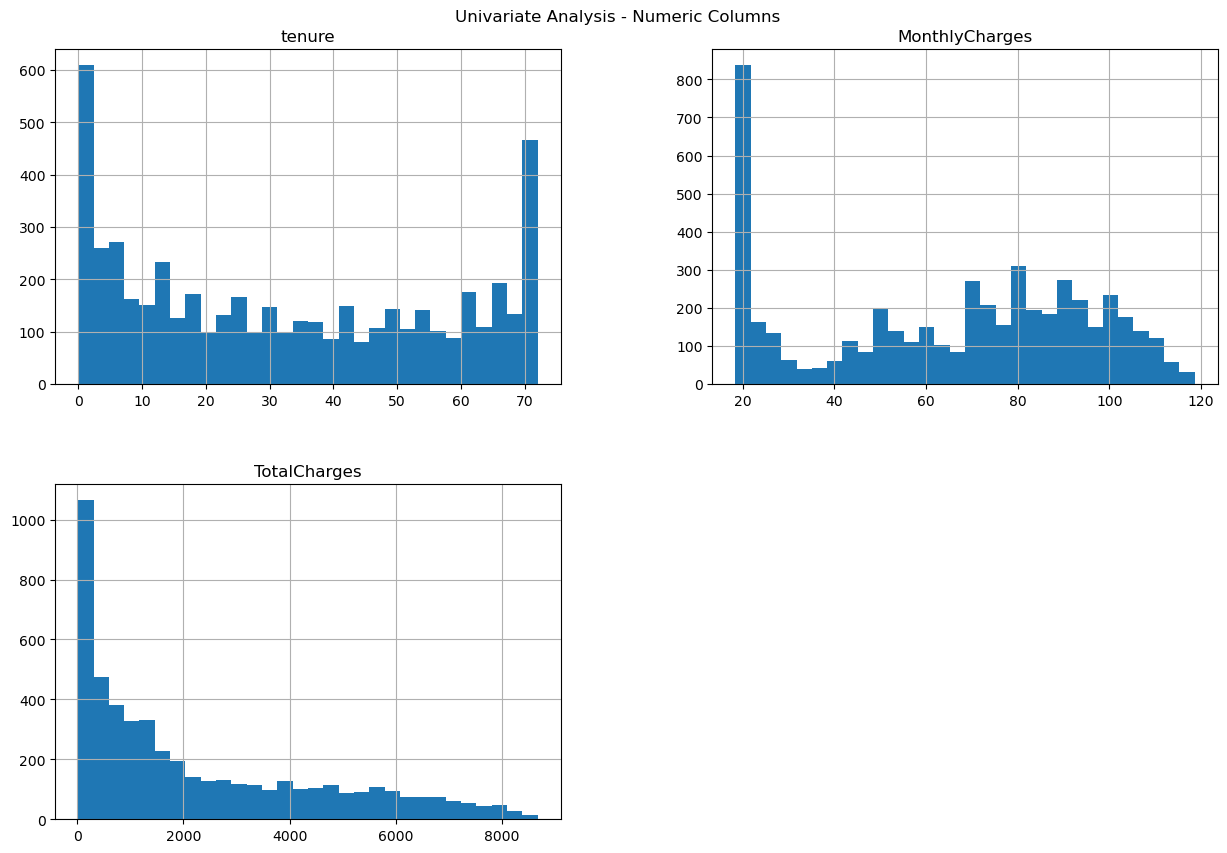

In [32]:
# Univariate Analysis
# Numeric Columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_train[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Univariate Analysis - Numeric Columns', y=0.92)
plt.show()

In [33]:
# Categorical Columns(Univariate)
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

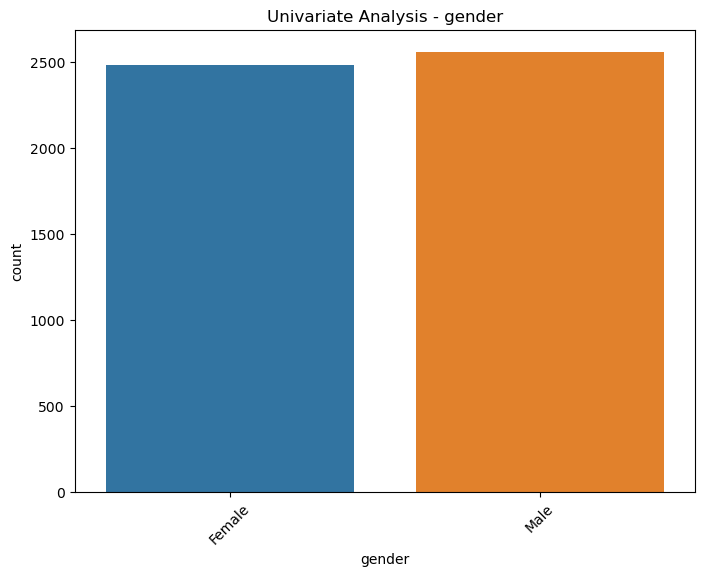

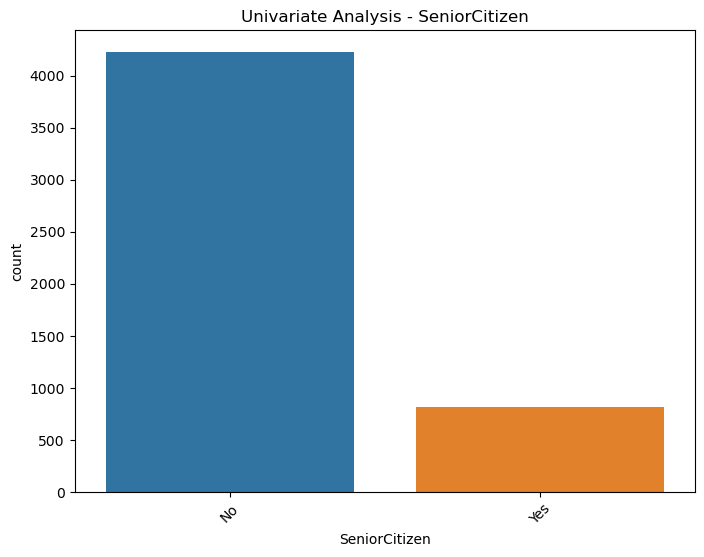

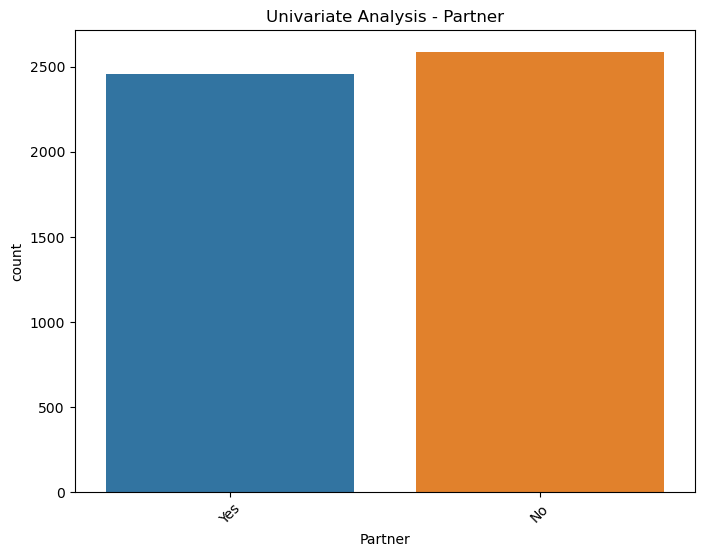

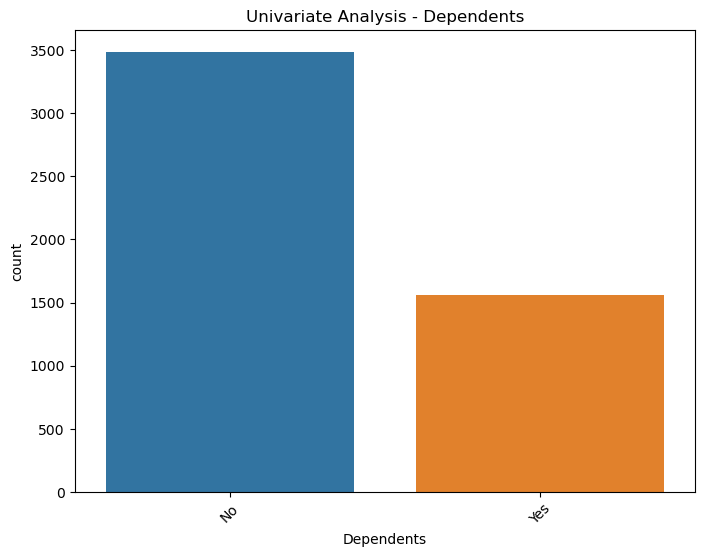

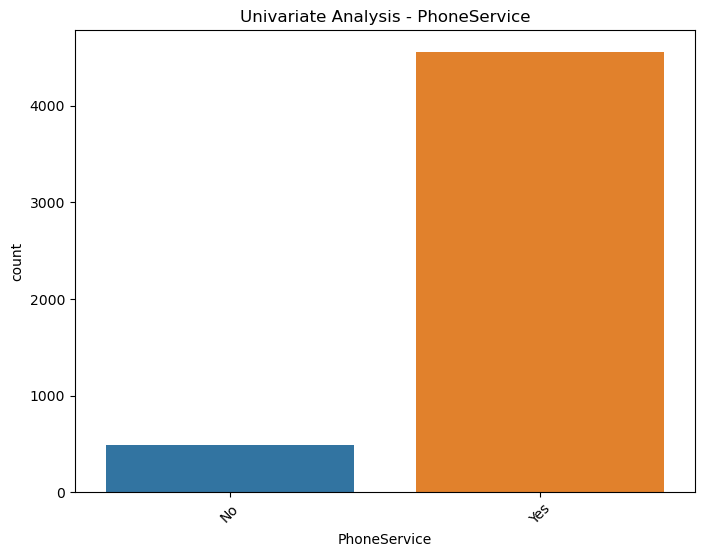

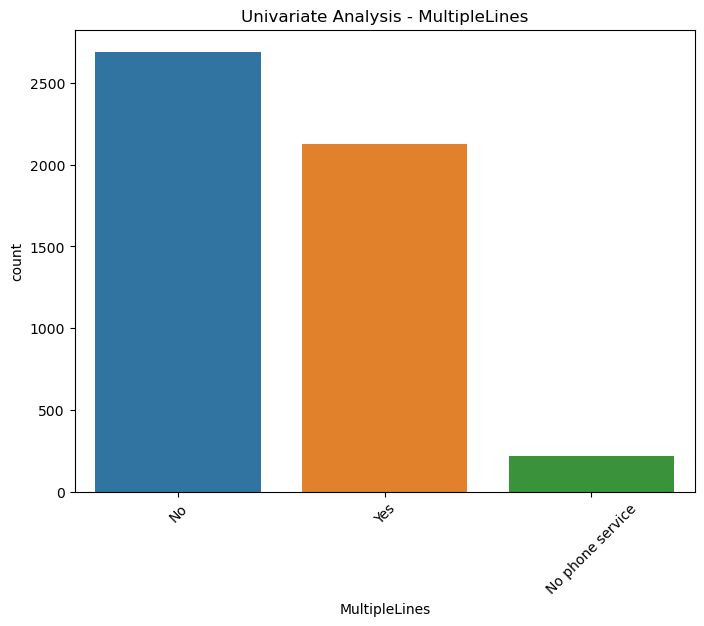

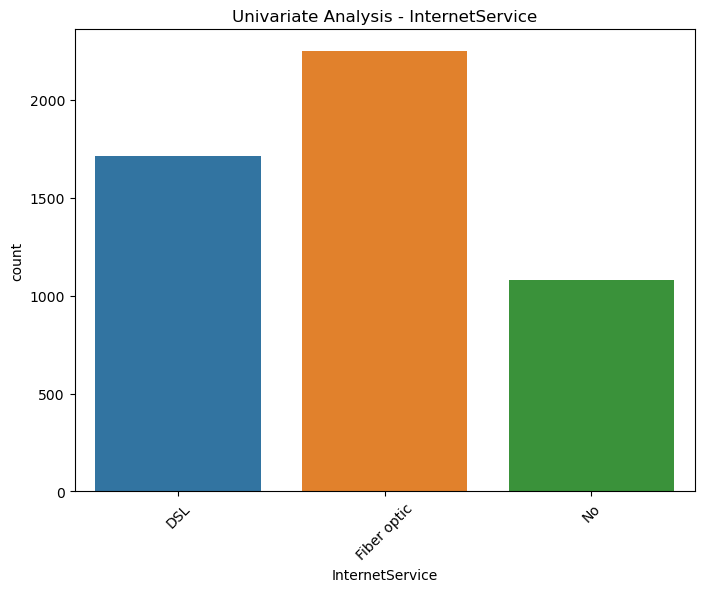

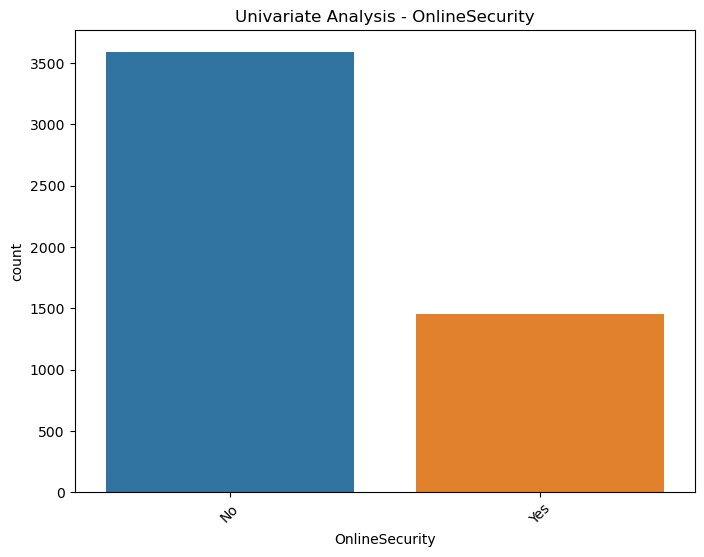

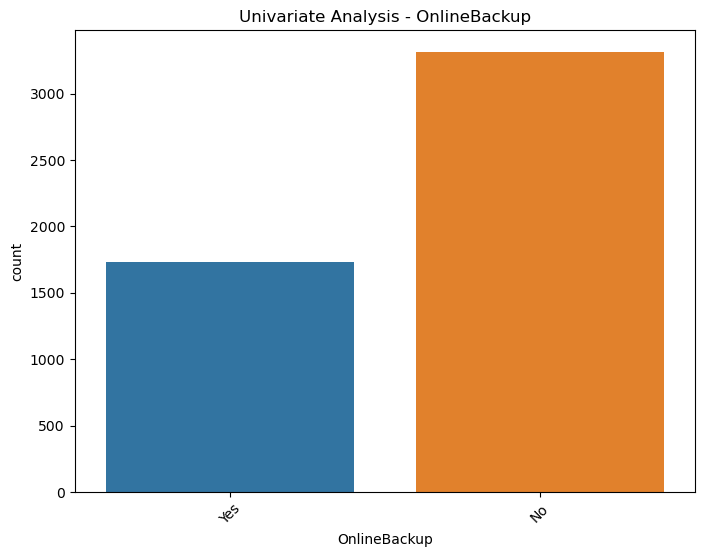

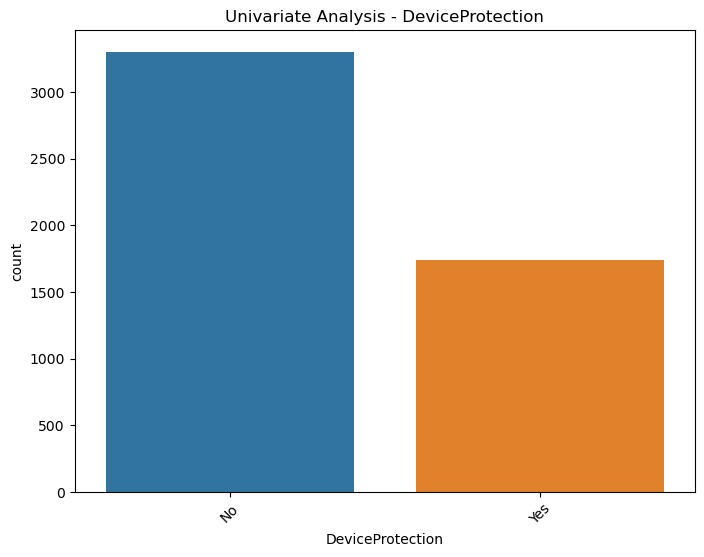

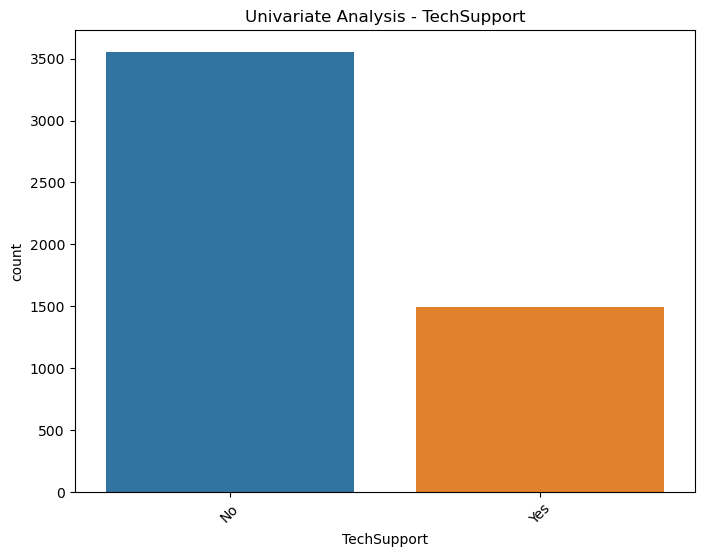

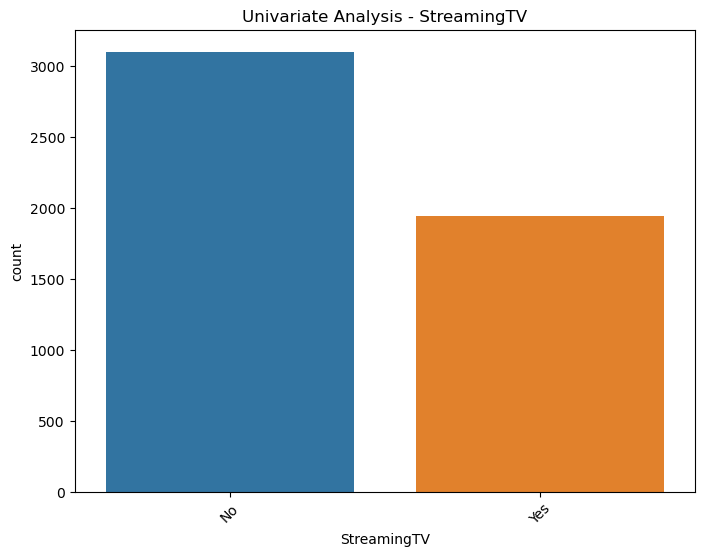

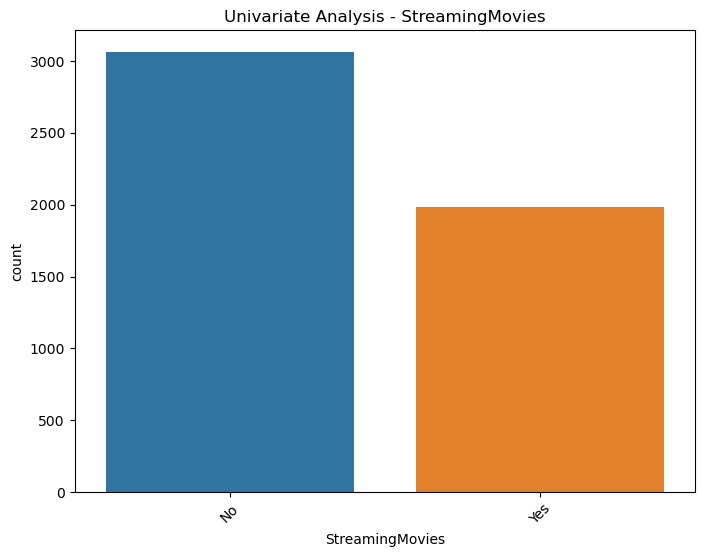

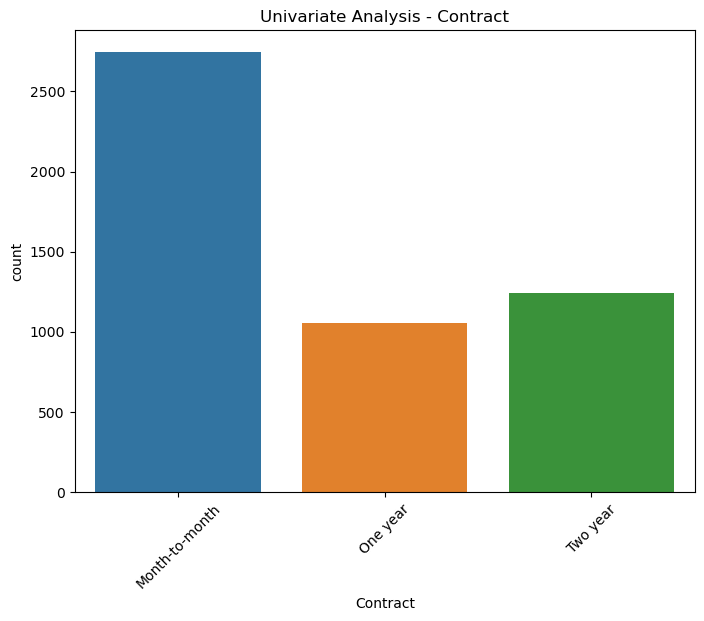

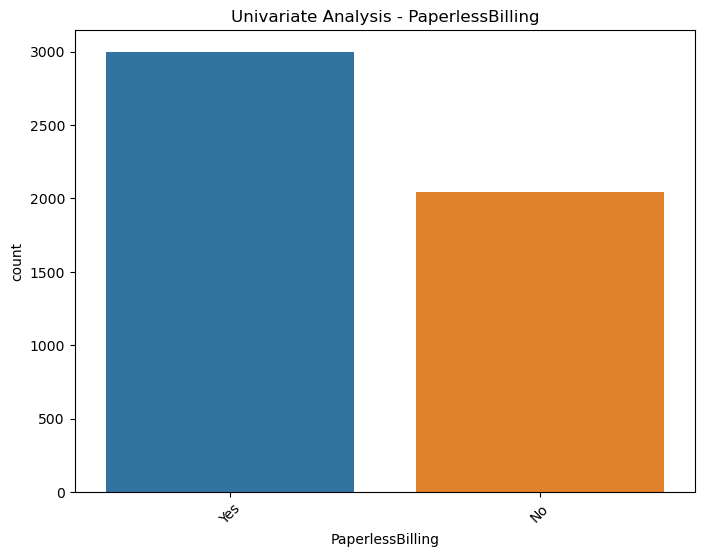

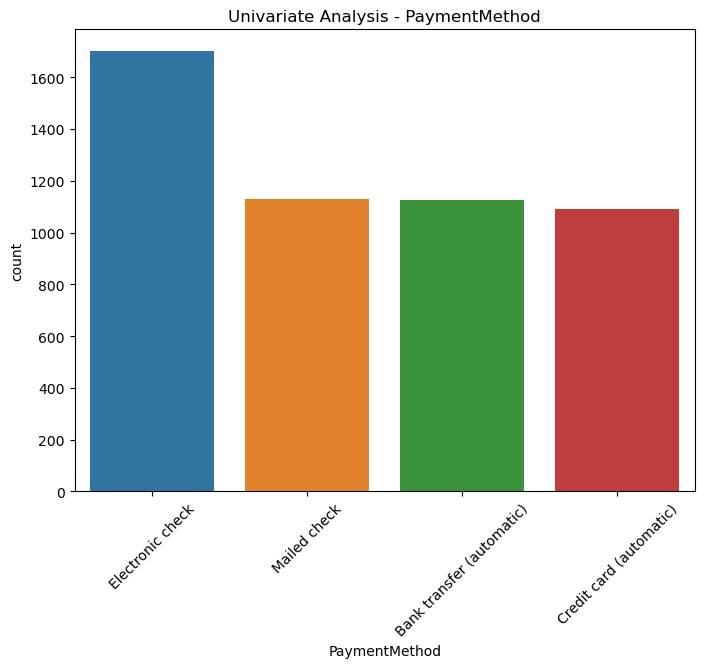

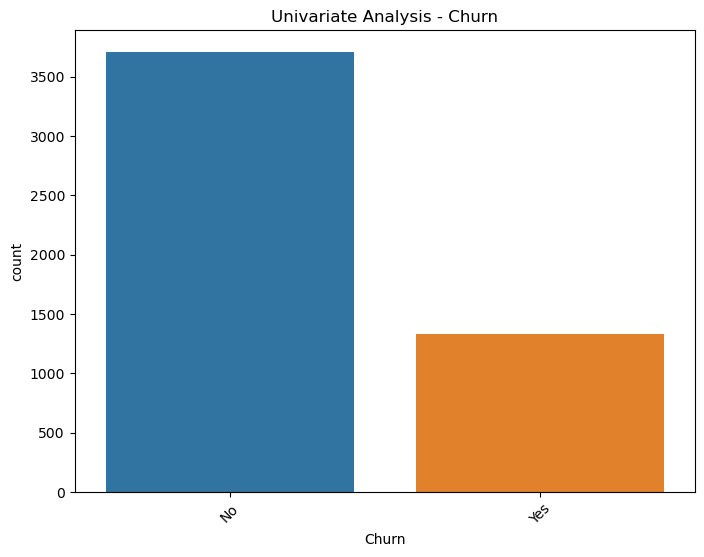

In [34]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_train)
    plt.title(f'Univariate Analysis - {column}')
    plt.xticks(rotation=45)
    plt.show()

## Bivariate Analysis 

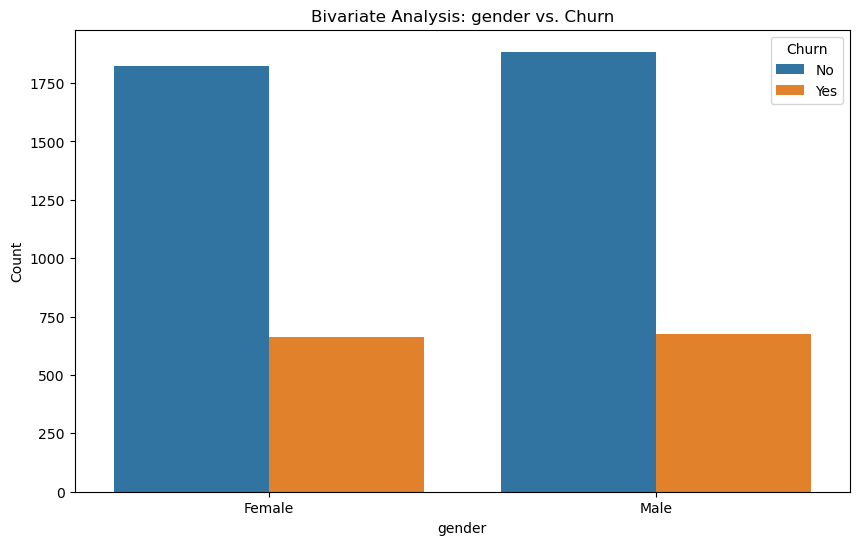

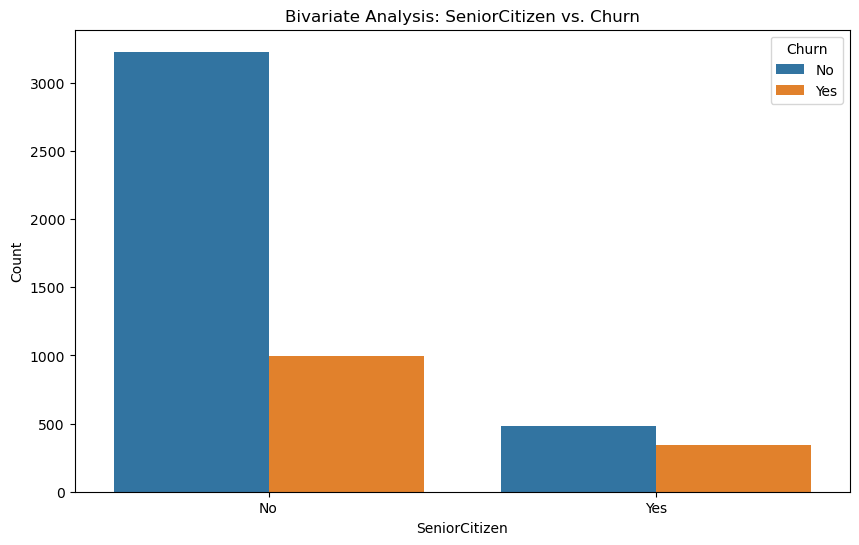

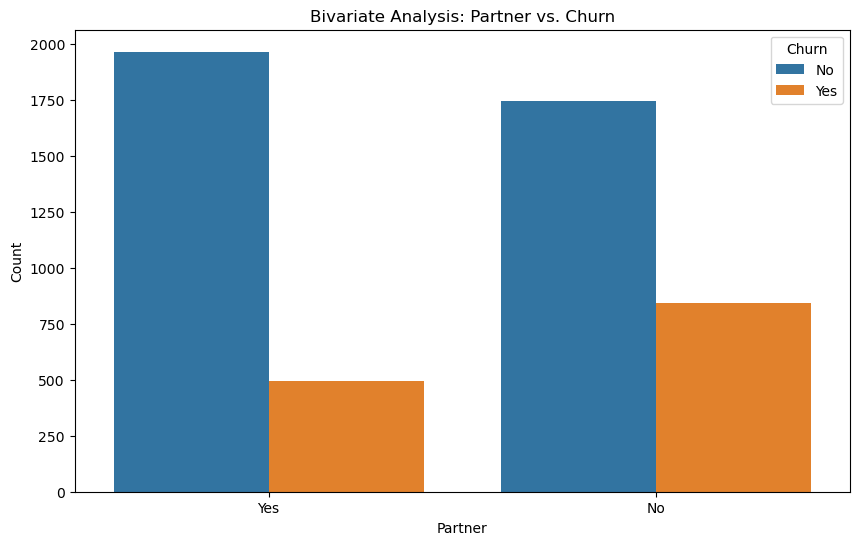

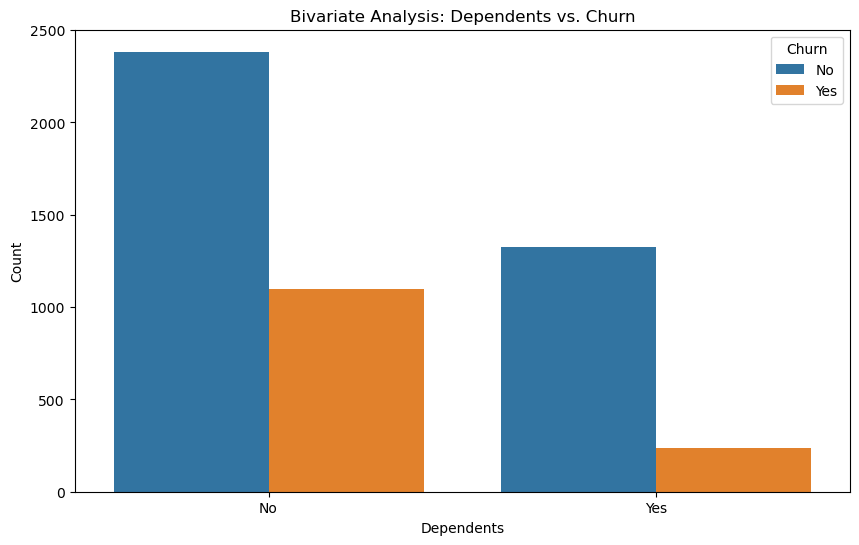

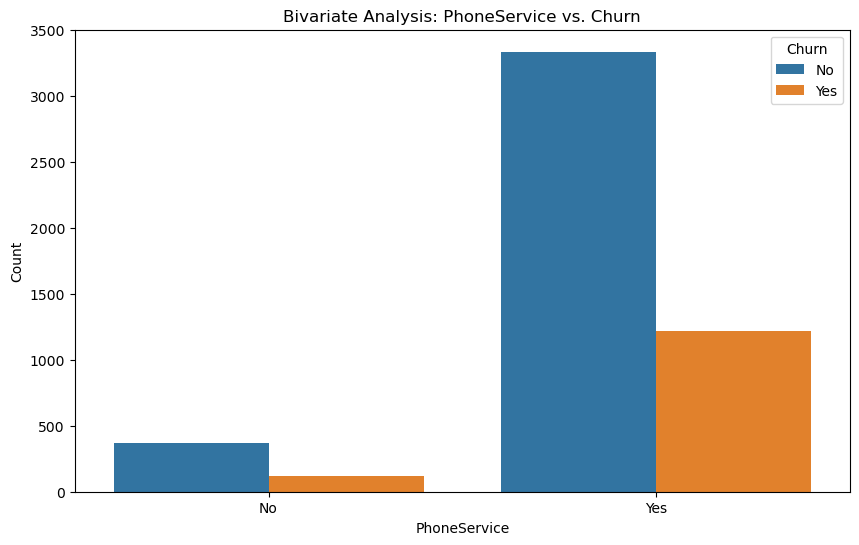

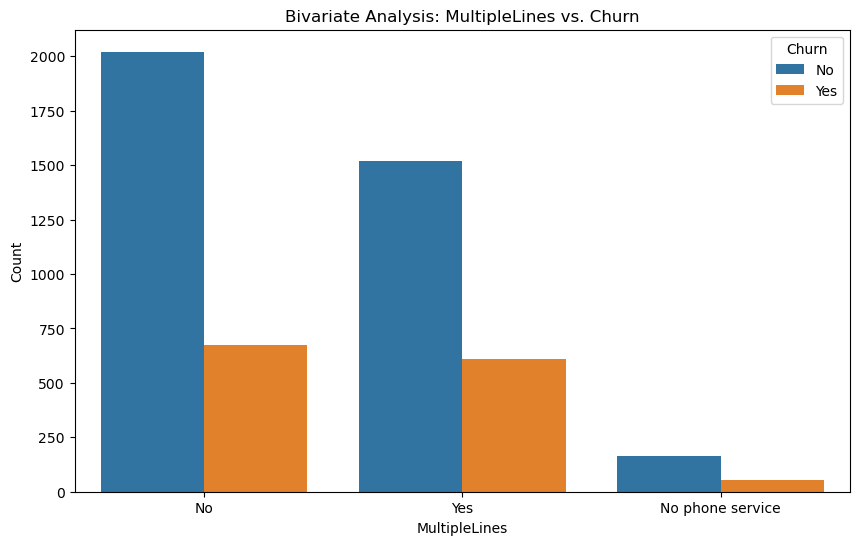

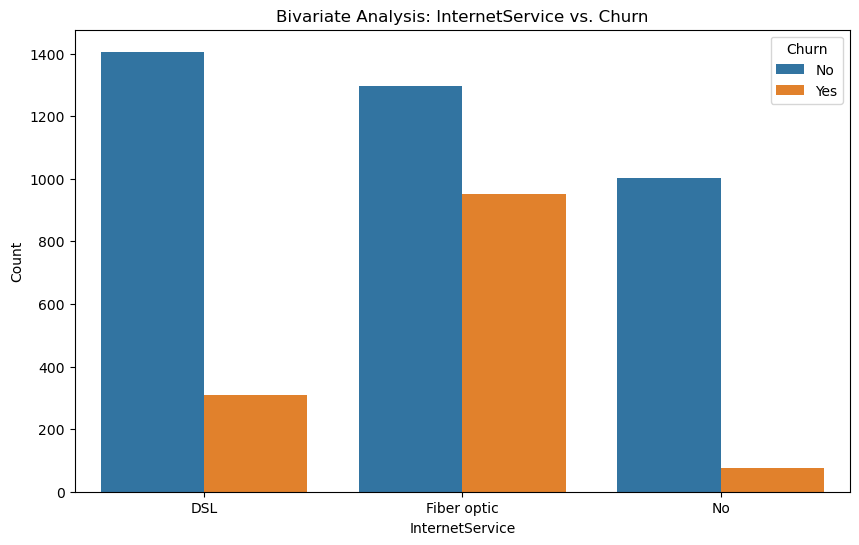

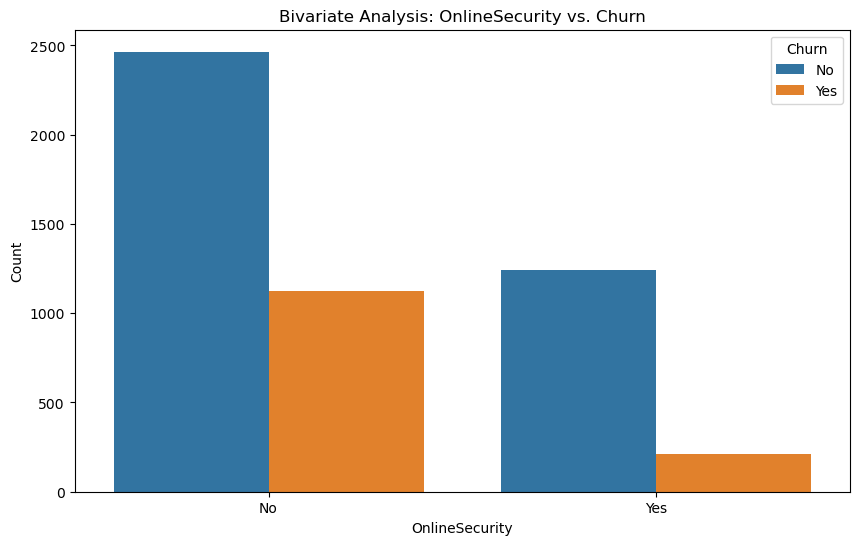

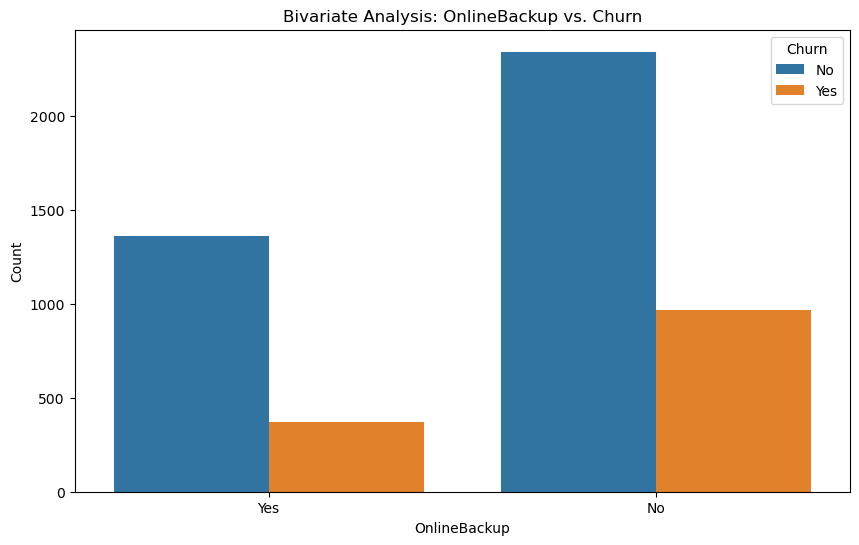

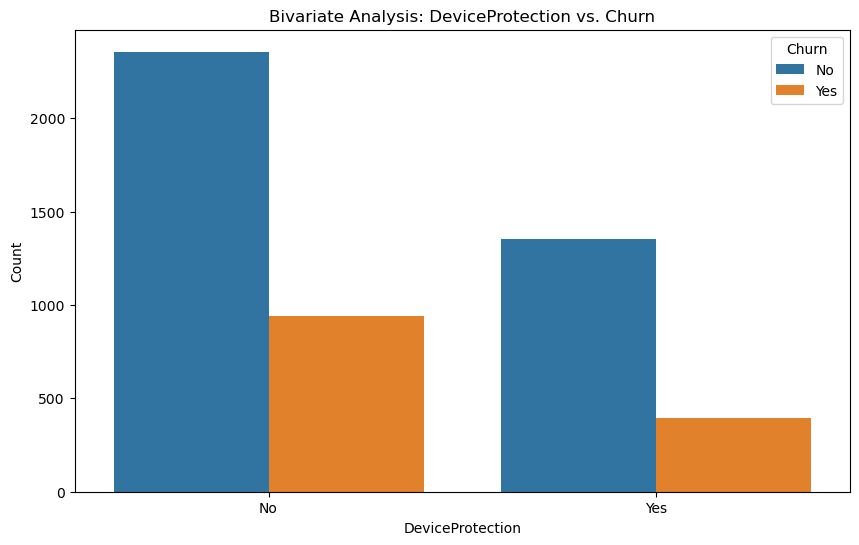

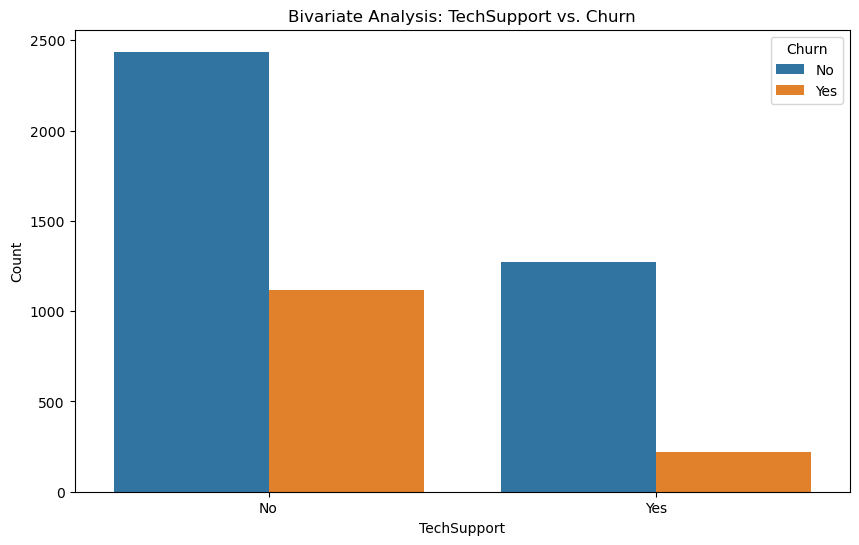

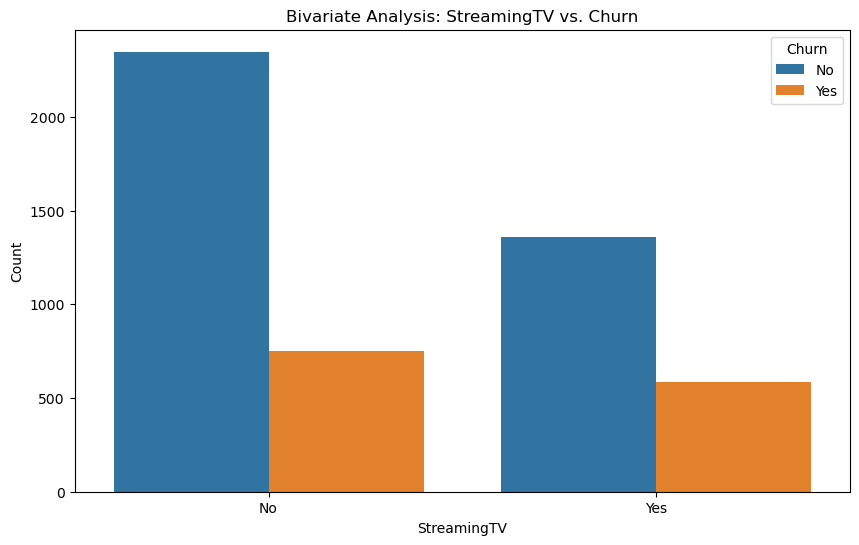

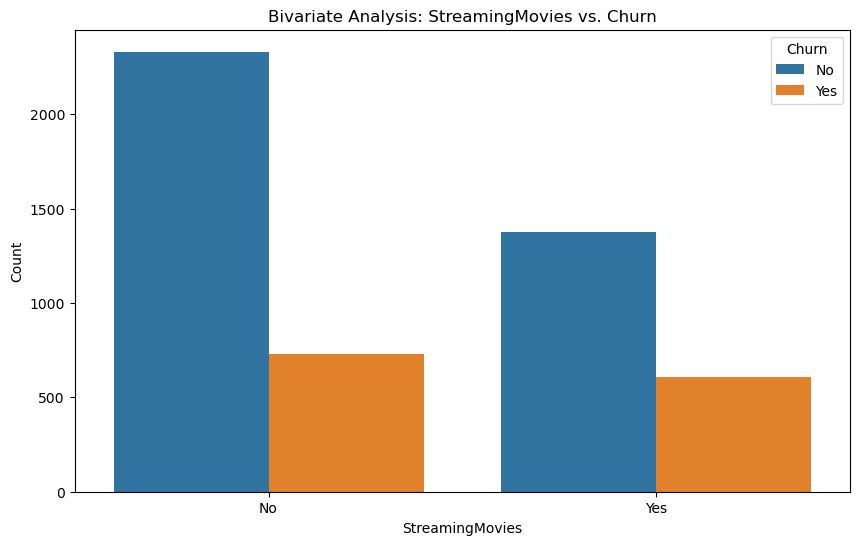

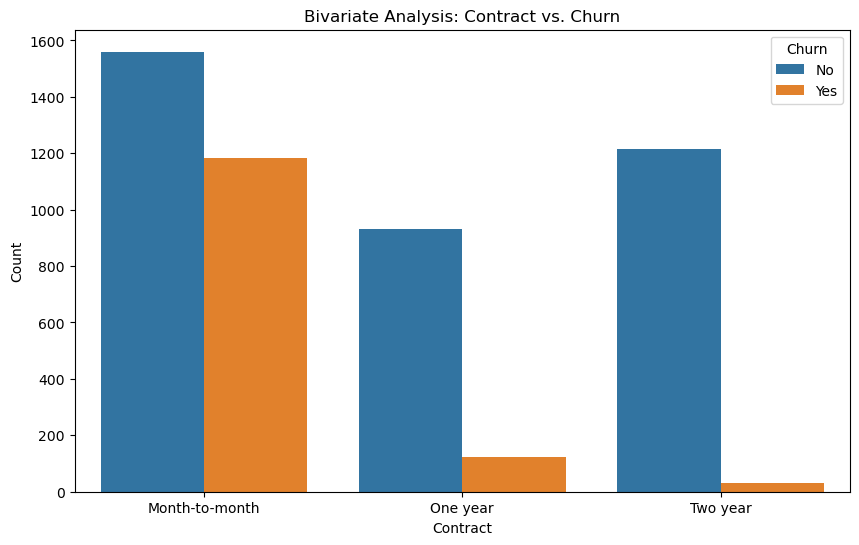

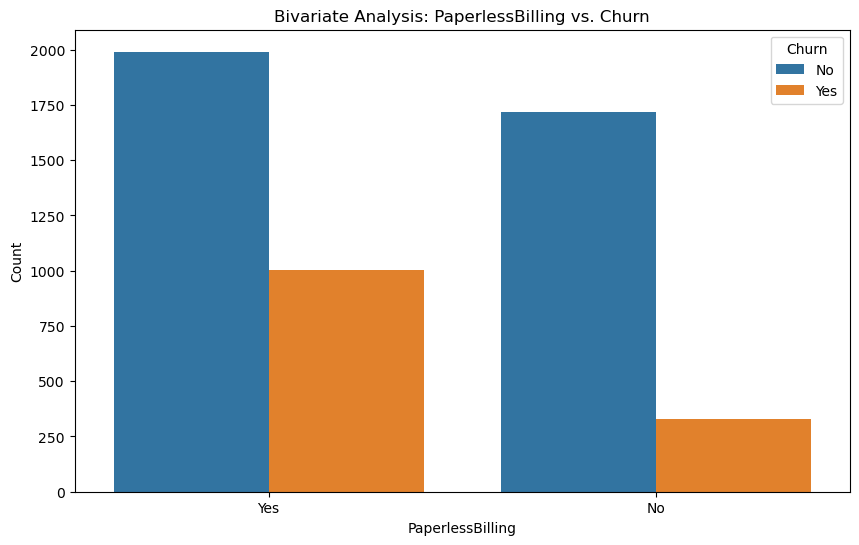

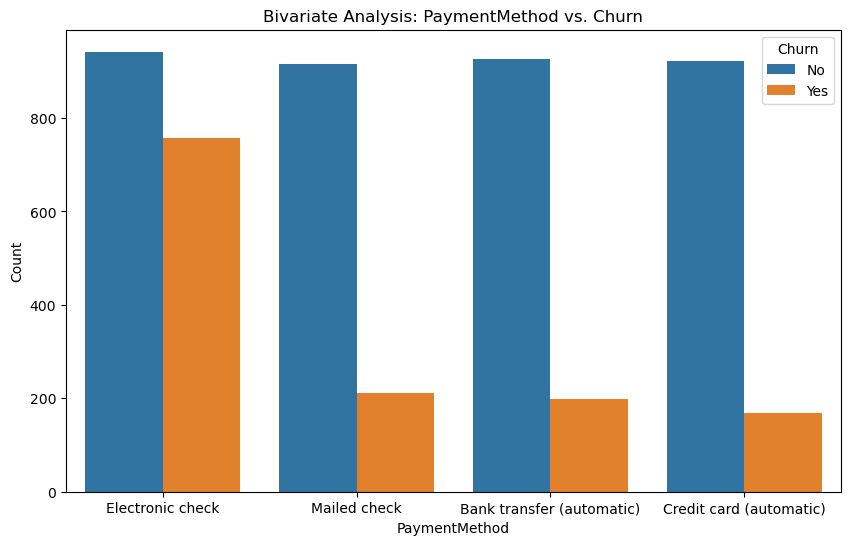

In [35]:
# Bivariate Analysis
for column in categorical_columns:
    if column != 'Churn':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Churn', data=df_train)
        plt.title(f'Bivariate Analysis: {column} vs. Churn')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Churn', labels=['No', 'Yes'])
        plt.show()

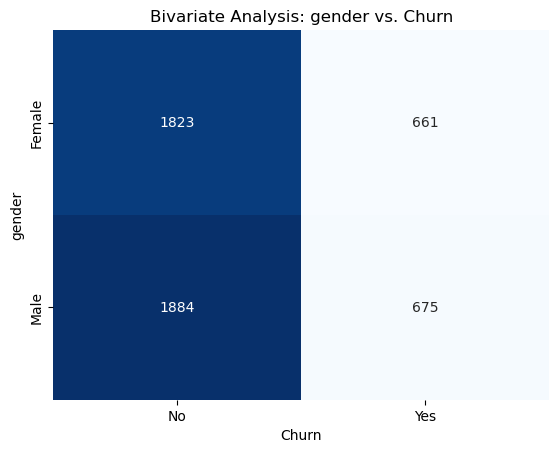

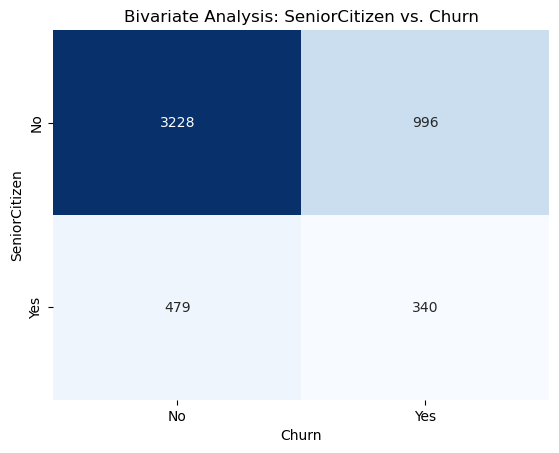

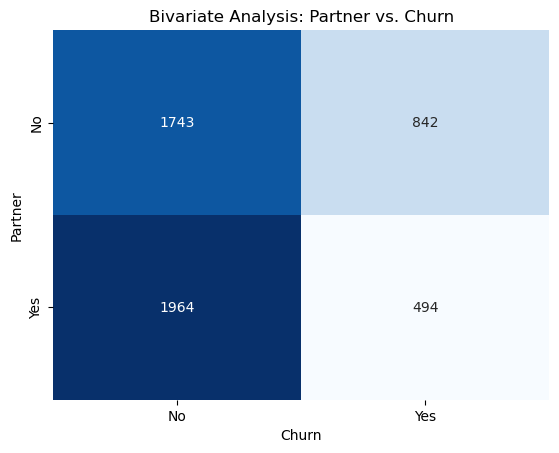

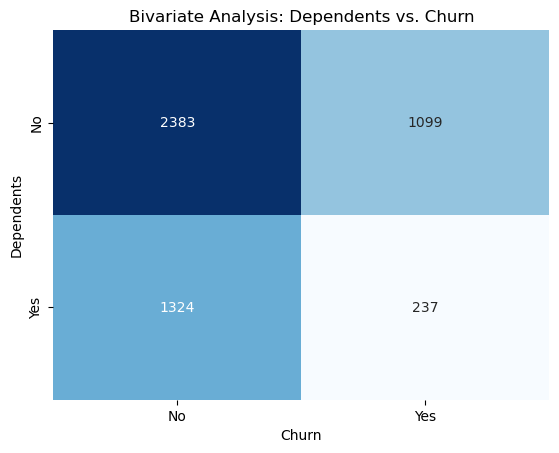

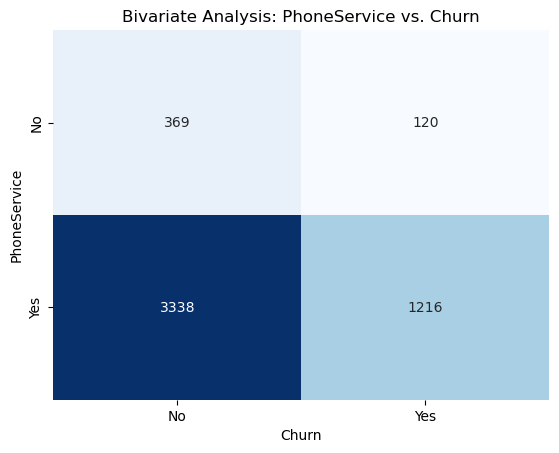

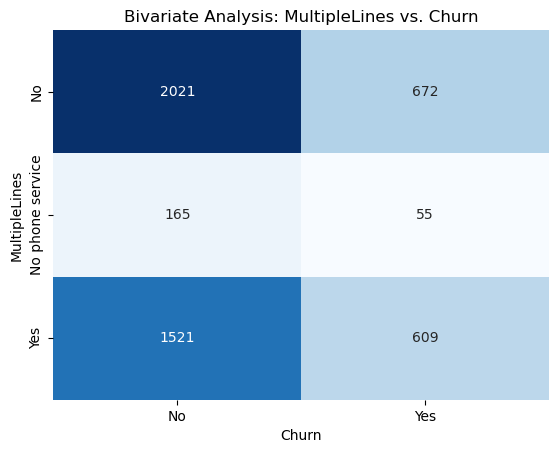

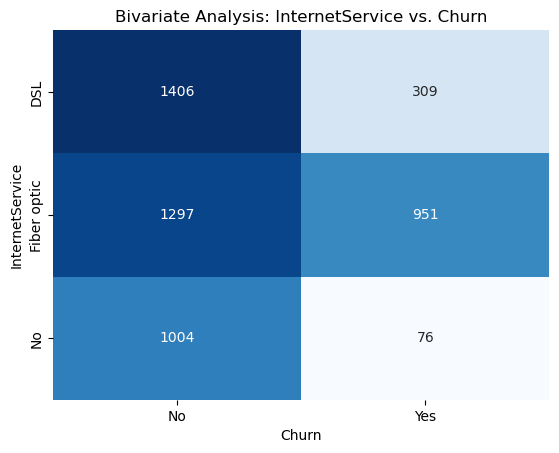

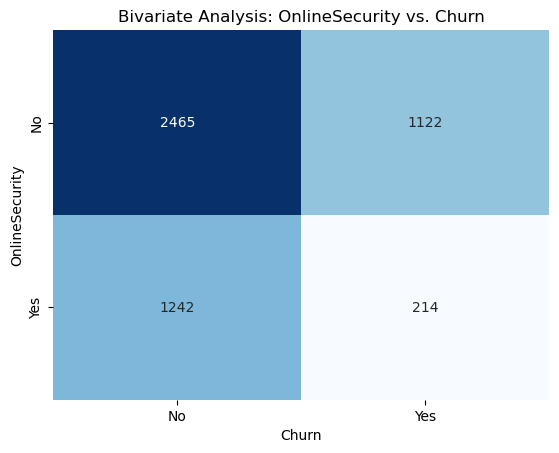

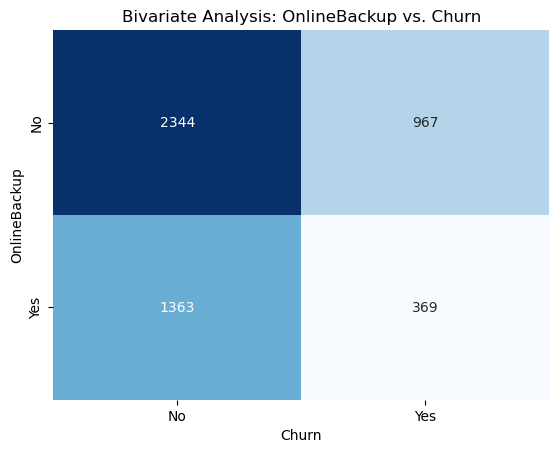

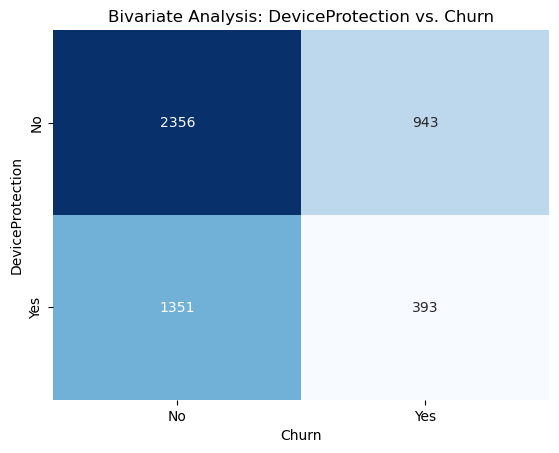

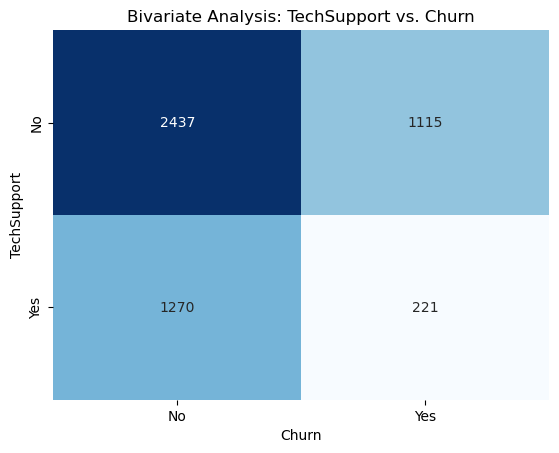

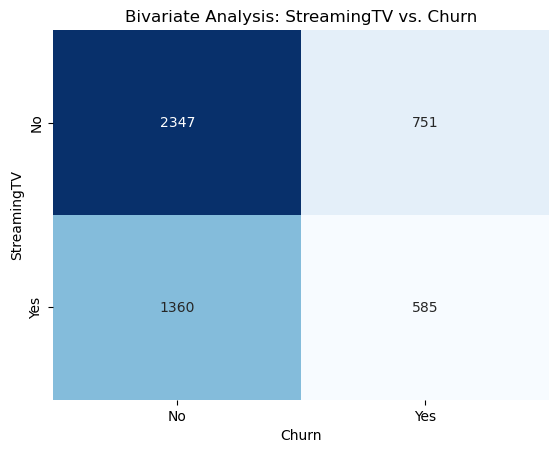

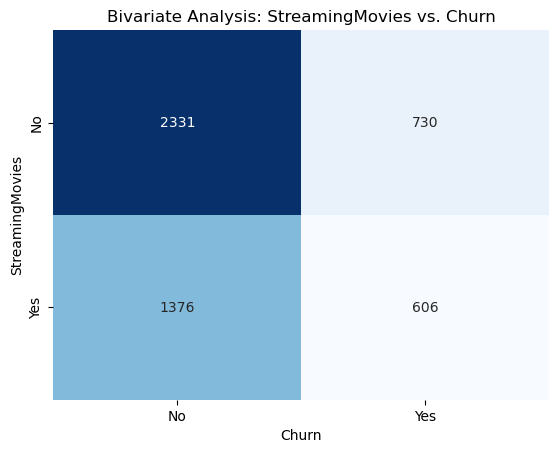

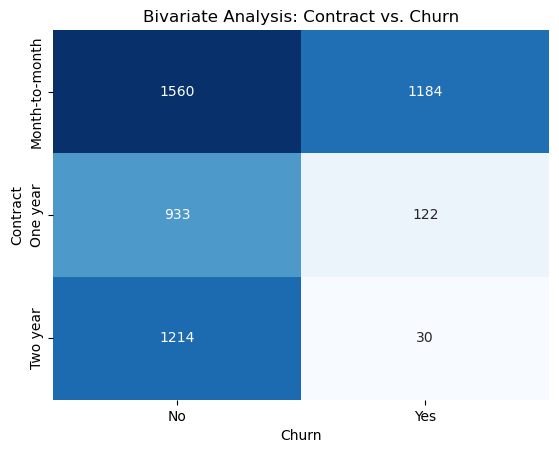

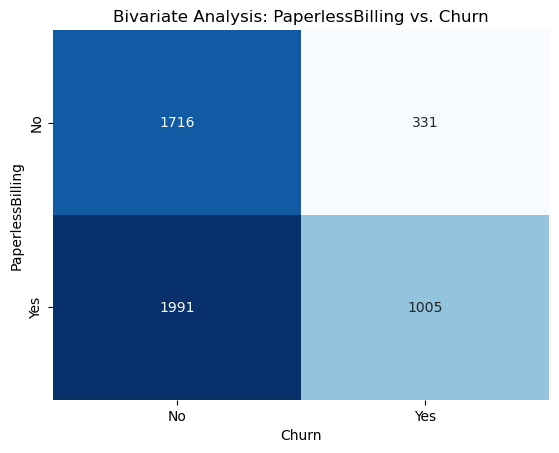

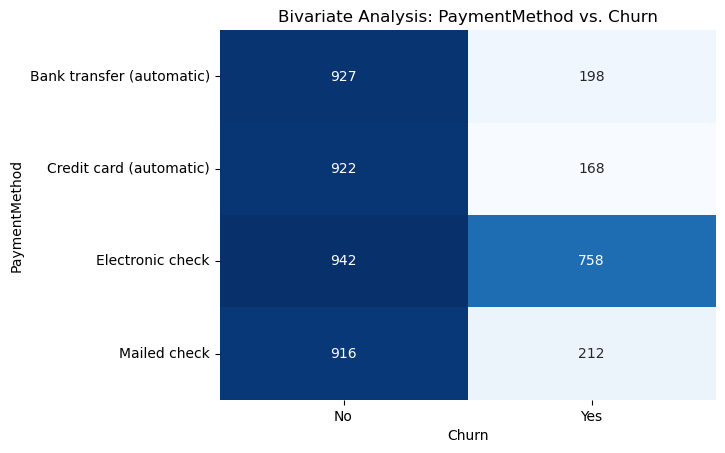

In [36]:
#Bivariate Analysis (with a heatmap)
for column in categorical_columns:
    if column != 'Churn':
        crosstab = pd.crosstab(df_train[column], df_train['Churn'])
        sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d', cbar=False)
        plt.title(f'Bivariate Analysis: {column} vs. Churn')
        plt.xlabel('Churn')
        plt.ylabel(column)
        plt.show()

## Multivariate Analysis 

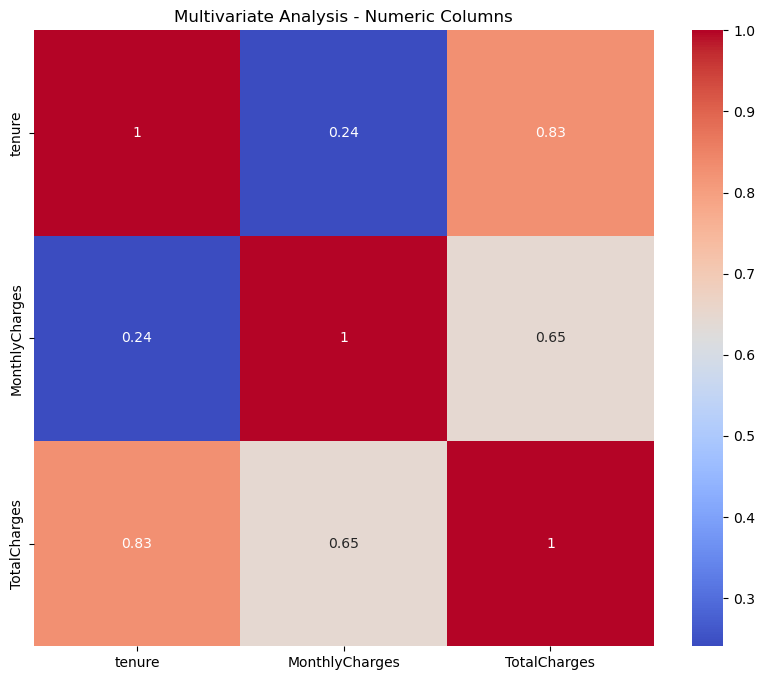

In [37]:
# Multivariate Analysis
# Numeric Columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(10, 8))
sns.heatmap(df_train[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Multivariate Analysis - Numeric Columns')
plt.show()


## HYPOTHESIS TEST

## H0 - There is no significant difference in churn rates between male and female customers.

## H1 -Is there a significant difference in churn rates between male and female customers?

Hypothesis Test: Chi-Square Test of Independence

In [38]:
contingency_table = pd.crosstab(df_train['gender'], df_train['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Print the results
print("Chi-Square Test of Independence - Gender vs. Churn")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p_value}")

# Check the result based on the significance level
if p_value < alpha:
    print("There is a significant association between gender and churn.")
else:
    print("There is no significant association between gender and churn.")


Chi-Square Test of Independence - Gender vs. Churn
Chi2 statistic: 0.024146708104267937
P-value: 0.8765122032778316
There is no significant association between gender and churn.


The Chi2 statistic is a measure of the discrepancy between the observed frequencies and the frequencies that would be expected if the two variables (gender and churn) were independent. A smaller Chi2 statistic indicates a smaller discrepancy.

Our p-value (0.8765) is greater than the commonly used significance level of 0.05, we fail to reject the null hypothesis. This means that there is not enough evidence to suggest a significant association between gender and churn. Therefore, we can conclude that gender does not have a significant influence on customer churn based on the available data.

## H0 : The type of internet service does not influence customer churn.

## H1 : Does the type of internet service influence customer churn?

Hypothesis Test: Chi-Square Test of Independence

In [39]:
contingency_table = pd.crosstab(df_train['InternetService'], df_train['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Print the results
print("Chi-Square Test of Independence - Internet Service vs. Churn")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p_value:.2f}")

# Check the result based on the significance level
if p_value < alpha:
    print("There is a significant association between Internet Service and Churn.")
else:
    print("There is no significant association between Internet Service and Churn.")


Chi-Square Test of Independence - Internet Service vs. Churn
Chi2 statistic: 561.78
P-value: 0.00
There is a significant association between Internet Service and Churn.


The chi2 statistic measures the degree of association between the variables (Internet Service and Churn)

the p-value is extremely small (0.00), significantly lower than the common significance level of 0.05, we reject the null hypothesis. This means that there is strong evidence to suggest a significant association between Internet Service and Churn. The result indicates that the type of Internet Service a customer has is likely to have an impact on their likelihood to churn.

## H0 :Customers with a longer tenure more likely to churn.

## H1 : Are customers with a longer tenure less likely to churn?

Hypothesis Test: T-test 

In [40]:
group1 = df_train[df_train['Churn'] == 'No']['tenure'].values
group2 = df_train[df_train['Churn'] == 'Yes']['tenure'].values

t_statistic, p_value = ttest_ind(group1, group2)

# Set the significance level
alpha = 0.05

# Print the results
print("Independent t-test - Tenure vs. Churn")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Check the result based on the significance level
if p_value < alpha:
    print("There is a significant difference in tenure between churned and non-churned customers.")
else:
    print("There is no significant difference in tenure between churned and non-churned customers.")


Independent t-test - Tenure vs. Churn
T-statistic: 26.60
P-value: 0.00
There is a significant difference in tenure between churned and non-churned customers.


The t-statistic value is 26.60. This value represents the magnitude of the difference in the average tenure between churned and non-churned customers. 

The p-value is 0.00. This value represents the probability of obtaining the observed difference in tenure between churned and non-churned customers by chance alone. In this case, the p-value is extremely small, indicating strong evidence against the null hypothesis (no difference).

## H0 - The payment method does not influence customer churn.

## H1- Does the payment method influence customer churn?

Hypothesis Test: Chi-Square Test of Independence

In [41]:
contingency_table = pd.crosstab(df_train['PaymentMethod'], df_train['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Print the results
print("Chi-Square Test of Independence - Payment Method vs. Churn")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p_value:.2f}")

# Check the result based on the significance level
if p_value < alpha:
    print("There is a significant association between Payment Method and Churn.")
else:
    print("There is no significant association between Payment Method and Churn.")


Chi-Square Test of Independence - Payment Method vs. Churn
Chi2 statistic: 434.58
P-value: 0.00
There is a significant association between Payment Method and Churn.


A Chi2 statistic of 434.58 indicates a stronger association

The p-value of (0.00) represents the probability of observing the association between Payment Method and Churn by chance alone.

we can conclude that there is a significant association between Payment Method and Churn. The choice of Payment Method appears to have an influence on the likelihood of a customer churning.

## Answering Questions with Visualizations

## Question 1:  Is there a significant difference in churn rates between male and female customers?

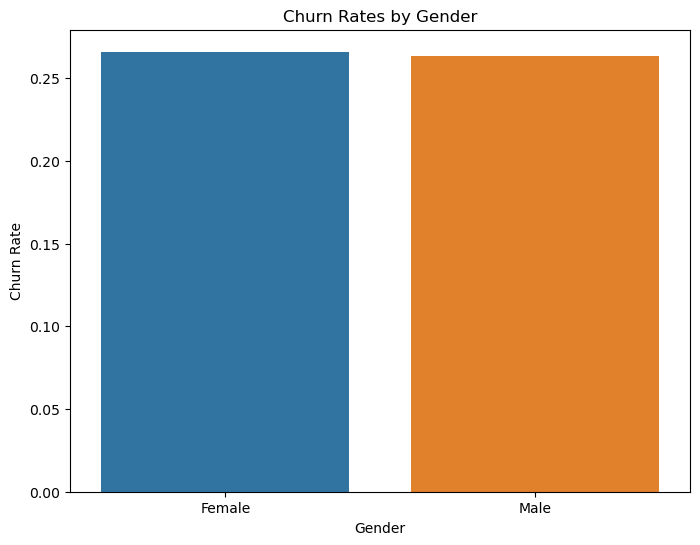

In [42]:
# Create a contingency table of gender and churn
contingency_table = pd.crosstab(df_train['gender'], df_train['Churn'])

# Calculate the churn rates by gender
churn_rates = contingency_table['Yes'] / contingency_table.sum(axis=1)

# Plot the churn rates
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values)
plt.title('Churn Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()


The female churn rate is approximately 0.25 and the male churn rate is approximately 0.23, it suggests that there is a slight difference in churn rates between the two genders. However, the difference is relatively small.

This means that, on average, the churn rate for female customers is slightly higher than the churn rate for male customers, but the difference is not substantial. It indicates that gender alone may not be a strong predictor of customer churn in this dataset. 

## Question 2 : Does the type of internet service influence customer churn

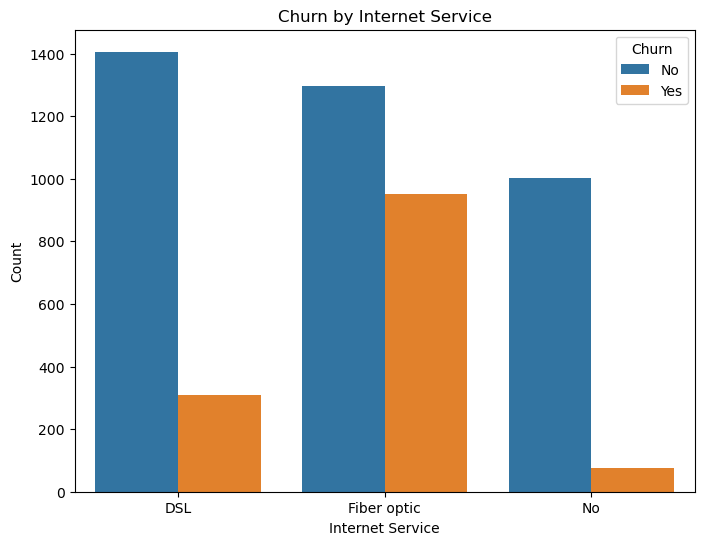

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=df_train)
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

The results of the visualization indicate that customers with DSL internet service have the highest number of non-churned customers, with a count of 1400. On the other hand, the count of churned customers for DSL internet service is 300. 

This suggests that customers with DSL internet service are less likely to churn compared to other internet service types. Optics, on the other hand, has a lower count of non-churned customers and a higher count of churned customers. 

In summary, the type of internet service does seem to influence customer churn, with DSL internet service showing a lower churn rate compared to other types.

##  Question 3 - Are customers with a longer tenure less likely to churn 

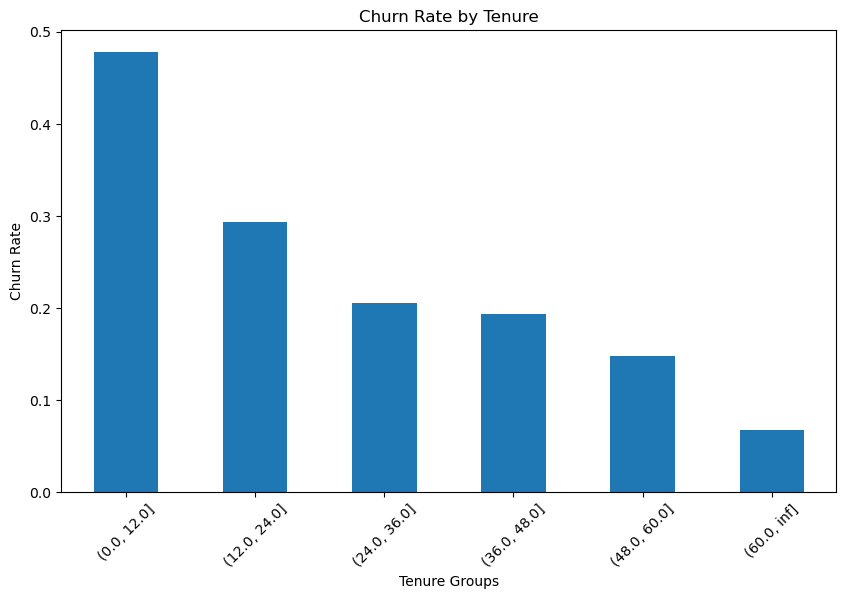

In [44]:
# Calculate churn rate for different tenure groups
tenure_groups = df_train.groupby(pd.cut(df_train['tenure'], bins=[0, 12, 24, 36, 48, 60, float('inf')]))
churn_rate = tenure_groups['Churn'].value_counts(normalize=True).unstack()['Yes']

# Plot the churn rate
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure Groups')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


Customers with a tenure of 0-12 months have the highest churn rate of 0.4. This indicates that customers who are relatively new to the service are more likely to churn. It could be because they are still in the early stages of evaluating the service or may have encountered issues that led to dissatisfaction.

Customers with a tenure of 24-36 months have a lower churn rate of 0.2. This suggests that customers who have been with the service for a moderate amount of time are less likely to churn compared to those with shorter tenures. 

Customers with a tenure of 60 months and above have the lowest churn rate of 0.05. This indicates that customers who have been with the service for a longer duration are significantly less likely to churn. These customers have likely developed a strong relationship with the service provider, are satisfied with the service, and may have a higher level of loyalty. 

In summary, the results suggest that there is a correlation between tenure and churn rate. Customers with longer tenures are indeed less likely to churn compared to those with shorter tenures. 

## Question 4 : Does the payment method influence customer churn?

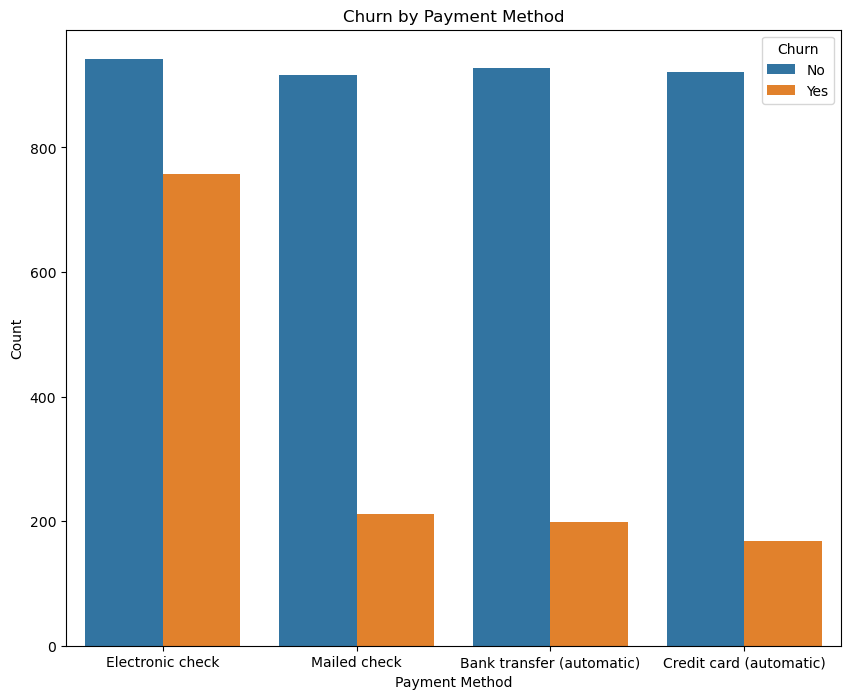

In [45]:
plt.figure(figsize=(10, 8))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_train)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

The results of the visualization indicate that the payment method of "Electronic check" has the highest count of both non-churned and churned customers, with approximately 900 non-churned and 750 churned customers. On the other hand, the payment methods "Mail check," "Bank transfer (automatic)," and "Credit card (automatic)" have a relatively similar number of customers at around 900, but their churn count is significantly lower at approximately 200.

This suggests that the payment method of "Electronic check" has a higher churn rate compared to other payment methods. Customers who use electronic checks as their payment method are more likely to churn compared to customers who use other payment methods such as mail check, bank transfer (automatic), or credit card (automatic).

In summary, the payment method does seem to influence customer churn, with electronic check users having a higher churn rate compared to other payment methods.